Reference: https://github.com/Siddharth1698/Machine-Learning-Codes/blob/main/knn_heart_disease/knn_heart_disease.ipynb

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px

In [2]:
heart = pd.read_csv('heart.csv')

In [3]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
def null_rate(df):
    for var in df.columns:
        null_rate = df[var].isna().sum()/len(df) *100
        if null_rate >0:
            print('{} has null rate {}%'.format(var, round(null_rate,2)))

In [6]:
null_rate(heart)

No null values.. Good News

In [12]:
# train test
from sklearn.model_selection import train_test_split
# Scale
from sklearn.preprocessing import StandardScaler
# Classification report
from sklearn.metrics import classification_report
# KNN
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score


In [8]:
# !pip install keras

In [9]:
# !pip install tensorflow

In [10]:
# from keras.models import Sequential

/Users/shru/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


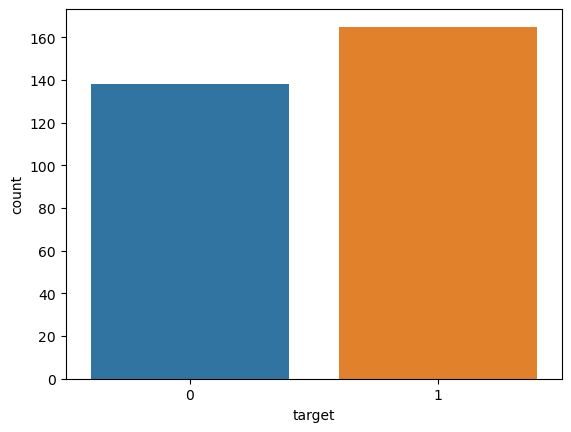

In [15]:
sns.countplot(heart['target']);

In [16]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
x = heart.iloc[:, 0:13].values

In [19]:
y = heart['target'].values

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [21]:
scaler = StandardScaler()

In [24]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
error = []

In [27]:
# Calculating error for K values between 1 and 30
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i!=y_test))

Minimum error:- 0.13157894736842105 at K = 7


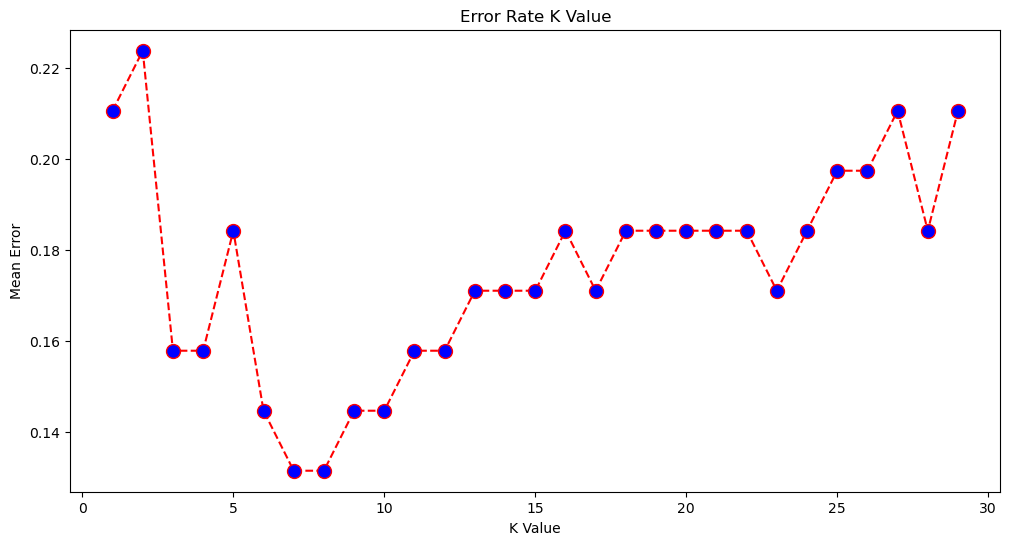

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [30]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [31]:
y_pred = classifier.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [34]:
cm

array([[26,  7],
       [ 3, 40]])

In [35]:
accuracy_score(y_test, y_pred)

0.868421052631579